In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
sns.set()
%matplotlib inline

C:\Users\unknow\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
train = pd.read_csv('train.tsv', sep='\t')
test = pd.read_csv('test.tsv', sep='\t')
submit = pd.read_csv('sample_submit.csv', header=None)

In [3]:
'''
カラム	ヘッダ名称	データ型	説明
0	id	int	インデックスとして使用
1	dteday	date	日付（2011-01-01～2012-12-31）
2	season	int	季節（1=春, 2=夏, 3=秋, 4=冬）
3	yr	bit	年（0=2011, 1=2012）
4	mnth	int	月
5	hr	int	時間
6	holiday	bit	祝日（1=祝日）
7	weekday	int	曜日（0=日, 1=月...6=土）
8	workingday	bit	平日（0=平日, 1=祝日）
9	weathersit	int	天気（1=晴,やや曇り, 2=薄い霧+曇り,霧+千切れ曇,霧+やや曇り,薄い霧, 3=小雪,小雨+雷雨+千切れ曇,小雨+千切れ曇, 4=大雨+凍雨+雷雨+霧,雪+濃い霧）
10	temp	float	規格化した温度（摂氏）（（t-t_min）/（t_max-t_min）, t_min=-8, t_max=+39）
11	atemp	float	規格化した体感温度（摂氏）（（t-t_min）/（t_max-t_min）, t_min=-16, t_max=+50）
12	hum	float	規格化した湿度（最大値の100で割った値）
13	windspeed	float	規格化した風速（最大値の67で割った値）
14	cnt	int	利用者数
'''
train

,id,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8640,8641,2011-12-31,1,0,12,19,0,6,0,1,0.42,0.4242,0.54,0.2239,92
8641,8642,2011-12-31,1,0,12,20,0,6,0,1,0.42,0.4242,0.54,0.2239,71
8642,8643,2011-12-31,1,0,12,21,0,6,0,1,0.40,0.4091,0.58,0.1940,52
8643,8644,2011-12-31,1,0,12,22,0,6,0,1,0.38,0.3939,0.62,0.1343,38


In [4]:
train.describe(include='all')

,id,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,8645.000000,8645,8645.000000,8645.0,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.00000,8645.000000,8645.000000,8645.000000
unique,NaN,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-06-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4323.000000,NaN,2.513592,0.0,6.573973,11.573626,0.027646,3.012724,0.683748,1.437594,0.489069,0.46900,0.643430,0.191172,143.794448
std,2495.740872,NaN,1.105477,0.0,3.428147,6.907822,0.163966,2.006370,0.465040,0.653859,0.197943,0.17676,0.196293,0.123191,133.797854
min,1.000000,NaN,1.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.00000,0.000000,0.000000,1.000000
25%,2162.000000,NaN,2.000000,0.0,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.320000,0.31820,0.490000,0.104500,31.000000
50%,4323.000000,NaN,3.000000,0.0,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.48480,0.650000,0.194000,109.000000
75%,6484.000000,NaN,3.000000,0.0,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.62120,0.810000,0.283600,211.000000


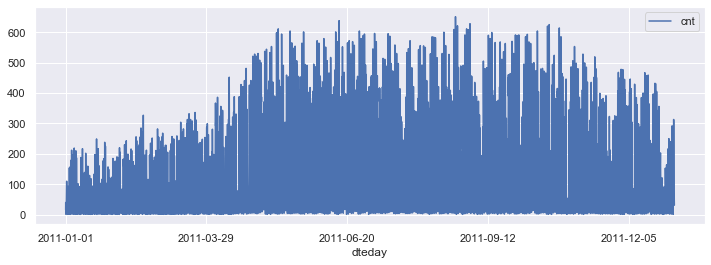

In [5]:
train.plot(x='dteday', y='cnt', figsize=(12, 4))

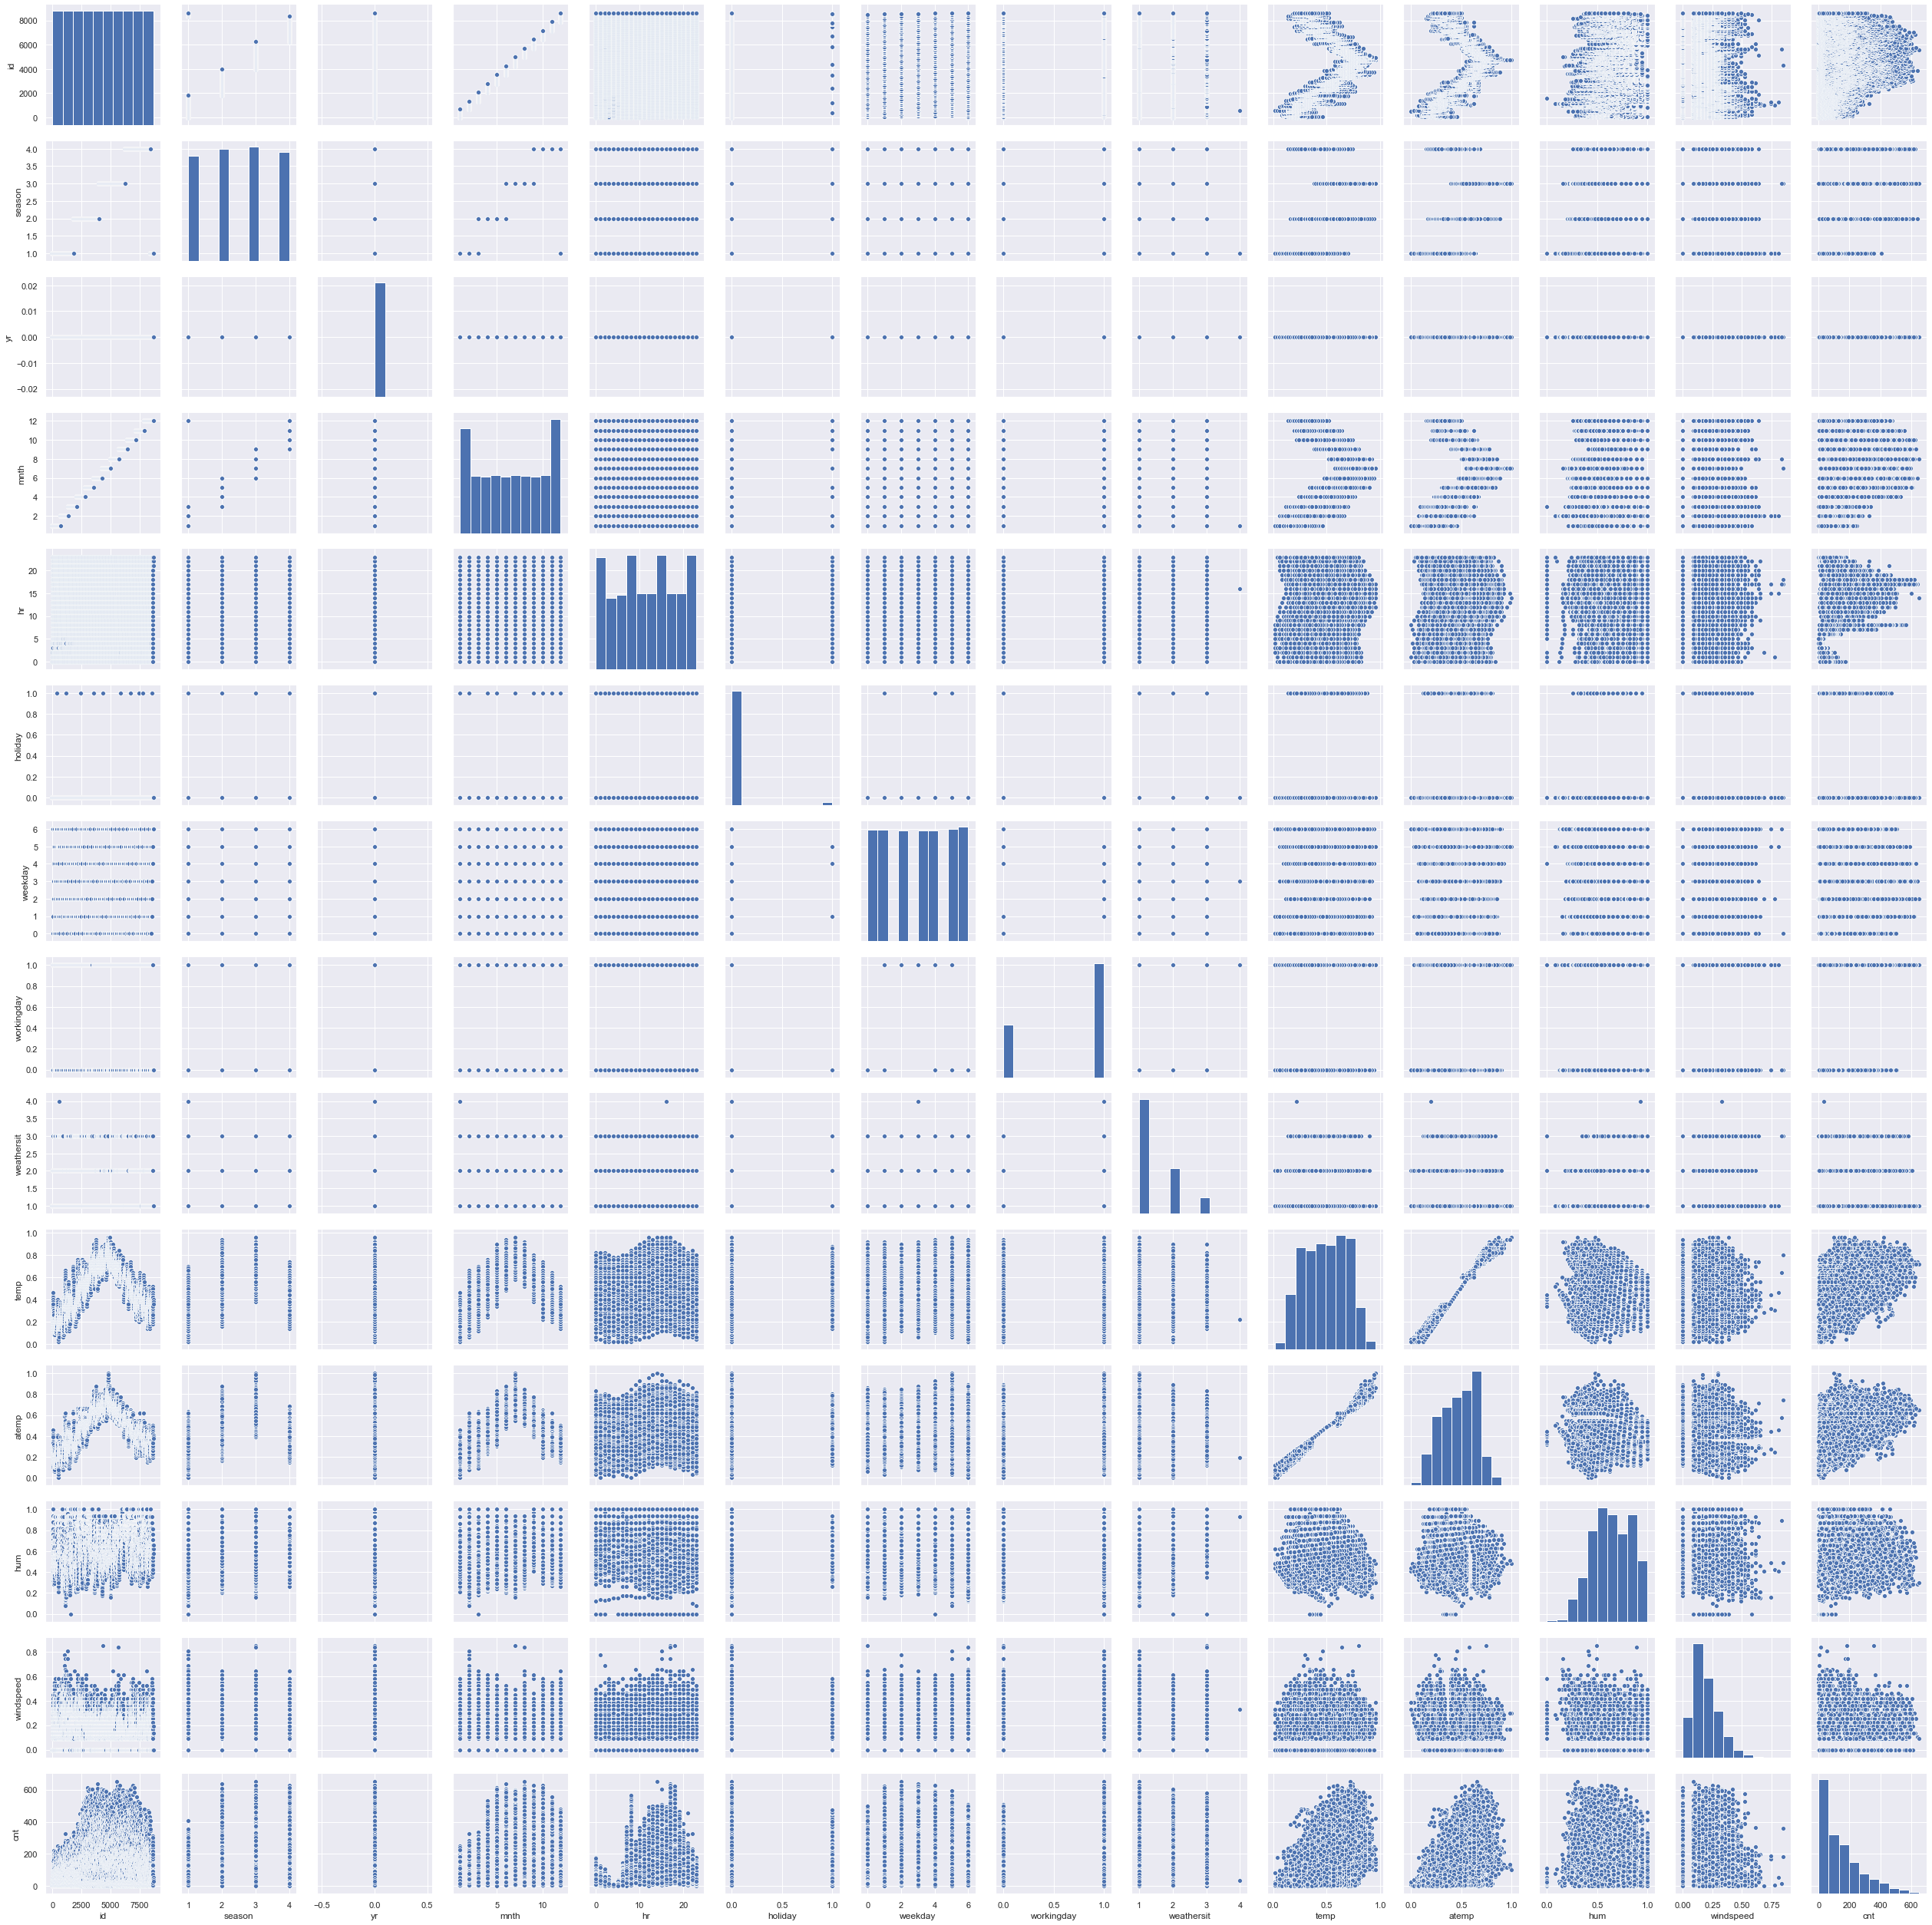

In [6]:
sns.pairplot(train)

In [7]:
corr = train.corr()
corr

,id,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
id,1.000000,0.824925,NaN,0.996461,-0.008772,0.031203,0.010960,0.003052,-0.020071,0.259605,0.271344,0.188215,-0.154082,0.178084
season,0.824925,1.000000,NaN,0.829054,-0.012179,-0.001116,-0.013639,0.013763,-0.015351,0.343535,0.351910,0.191793,-0.154735,0.221719
yr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mnth,0.996461,0.829054,NaN,1.000000,-0.011814,0.029806,0.012024,0.003573,-0.020662,0.260442,0.272676,0.188061,-0.155645,0.179273
hr,-0.008772,-0.012179,NaN,-0.011814,1.000000,-0.000929,-0.005618,0.003792,-0.016521,0.120548,0.116382,-0.251188,0.125153,0.407486
holiday,0.031203,-0.001116,NaN,0.029806,-0.000929,1.000000,-0.076324,-0.247934,0.008001,-0.020059,-0.026915,-0.022895,0.000502,-0.022912
weekday,0.010960,-0.013639,NaN,0.012024,-0.005618,-0.076324,1.000000,0.018572,0.027766,-0.038969,-0.042439,-0.051307,0.039586,-0.004321
workingday,0.003052,0.013763,NaN,0.003573,0.003792,-0.247934,0.018572,1.000000,0.068628,0.053405,0.052551,0.025305,0.010509,0.011704
weathersit,-0.020071,-0.015351,NaN,-0.020662,-0.016521,0.008001,0.027766,0.068628,1.000000,-0.092036,-0.096556,0.407634,0.048414,-0.143288
temp,0.259605,0.343535,NaN,0.260442,0.120548,-0.020059,-0.038969,0.053405,-0.092036,1.000000,0.992022,-0.039525,-0.005989,0.451233


In [8]:
## 変数減少法
X = train.drop(['id', 'dteday', 'cnt'], axis=1)
X

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...
8640,1,0,12,19,0,6,0,1,0.42,0.4242,0.54,0.2239
8641,1,0,12,20,0,6,0,1,0.42,0.4242,0.54,0.2239
8642,1,0,12,21,0,6,0,1,0.40,0.4091,0.58,0.1940
8643,1,0,12,22,0,6,0,1,0.38,0.3939,0.62,0.1343


In [9]:
Y = train['cnt']
Y

0       16
1       40
2       32
3       13
4        1
        ..
8640    92
8641    71
8642    52
8643    38
8644    31
Name: cnt, Length: 8645, dtype: int64

In [10]:
train_X, test_X, train_Y, test_Y = train_test_split(X, Y)

In [ ]:
import statsmodels.api as sm

# 回帰モデル作成
mod = sm.OLS(train_Y, sm.add_constant(train_X))

# 訓練
result = mod.fit() 

# 統計サマリを表示
print(result.summary())


In [ ]:
'''
Adj. R-squared:                  0.380
この値が0.85ぐらいを狙う

あとt値の絶対値が大きいほど、目標値への影響が大きいという指標になる
'hr', 'hum'

p値は0に近いほうがよい。0.05以上の値は採用しないほうがよい
'yr', 'weekday', 'workingday', 'weathersit', 'atemp', 'windspeed'


多重共線性の疑いのある変数を探します。
最初にそれぞれの説明変数と目的変数の相関係数を計算しました。もし変数が独立であれば、回帰係数も相関係数と同じ符号になるはずです。しかし多重共線性があると、回帰係数が一意に決まらず不安定になり、相関係数と異なる符号になる場合があります。これを確認してみます。
'''

# constを除くために1から始める
np.sign(result.params[1:])

# 目的変数を除くために-1までとする
np.sign(corr['cnt'][:-1])

# 0でない変数が相関している可能性あり
np.sign(result.params[1:]) - np.sign(corr['cnt'][:-1])

In [ ]:
'''
id, workingday, yrを除外
'''

# 回帰モデル作成
d = ['workingday', 'yr']
mod = sm.OLS(train_Y, sm.add_constant(train_X.drop(d, axis=1)))

# 訓練
result = mod.fit() 

# 統計サマリを表示
result.summary()

In [ ]:
# constを除くために1から始める
np.sign(result.params[1:])

# 目的変数を除くために-1までとする
np.sign(corr['cnt'][:-1])

# 0でない変数が相関している可能性あり
np.sign(result.params[1:]) - np.sign(corr['cnt'][:-1])

In [ ]:
train_X = train[['hr', 'hum']]
train_Y = train['cnt']

test = test[['hr', 'hum']]

In [ ]:
model = LinearRegression()
model.fit(train_X, train_Y)

In [ ]:
model.score(train_X, train_Y)

In [ ]:
predict = model.predict(test)

In [ ]:
submit[1] = predict

In [ ]:
submit.to_csv('submit1.csv', index=None, header=None)

In [ ]:

# 定数項(y切片)を必要とする線形回帰のモデル式ならば必須
sm_X = sm.add_constant(train_X)

# 最小二乗法でモデル化
model = sm.OLS(train_Y, sm_X)
result = model.fit()

# 重回帰分析の結果を表示する
result.summary()

In [ ]:
# 回帰モデル作成
d = ['yr', 'weekday', 'workingday', 'weathersit', 'atemp', 'windspeed']
mod = sm.OLS(Y, sm.add_constant(X.drop(d, axis=1)))

# 訓練
result = mod.fit() 

# 統計サマリを表示
result.summary()